# Introduction

Investigating a classic phenomenon from experimental psychology called the Stroop Effect . Details about it can be found on:

" https://en.wikipedia.org/wiki/Stroop_effect "


# Data Acquisition

In [215]:
#loading the file
import pandas as pd
filename=pd.read_csv("C:\\Users\\Jon Targaryen\\Desktop\\Udacity\\NanoDegree\\Data Analyst\\stroop exp\\stroopdata.csv")
filename


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


Reading the dataset from the file "stroopdata.csv" using the pandas built in function ".read_csv"

In [221]:
#getting basic information of the file
filename.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


The length is "24 " i.e 24 rows of 2 columns( Congruent & Incongruent) 

# 1. What is the independent variable? What is the dependent variable?


The independent variable would be the "predictor" variable or the "condition" variable or the "treatment" and something to be taken on X-axis.

Here it is: " Congruent" , "Incongruent".

The dependent variable is the "outcome" or the "measure". This would be taken on Y-axis.

Here it is : time to name the ink colors.

# 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify the choices.

To find the relationship between the response times for the two conditions (congruent and incongruent), the following would be an appropriate set of hypotheses:

$\mu(C) $ --- mean response time for the Congruent condition.

$\mu(I) $ --- mean response time for the Incongruent condition


**Ho: Null Hypothesis **: The mean response time for the two conditions, congruent and incongruent, are the same (or effectively the same).


$\mu(C)= \mu(I)$

**Ha: Alternate Hypothesis **: The mean response 
time for the two conditions, congruent and incongruent, has a statistical difference.

$\mu(C) > \mu(I)$ or

$\mu(C) < \mu(I)$ or in general

$\mu(C)$  != $\mu(I)$



The observations one can draw from the data are :

1) The population parameters (population mean and population standard deviation) are not known.

2) The same subjects are assigned two different conditions.The samples are dependent. i.e it is a "paired" experiment. Because the same subjects took the tests under different conditions, they are dependent samples.

3) If the sample size is less than 30, sample data no longer approximates a normal distribution, which makes the use of a Z value inappropriate for such case. In such cases, a t-distribution must be used.[1]



Based on these observations, the test which would be appropriate is a 2-sample dependent t-test.



With this test, we seek to determine whether there is enough evidence in the provided sample of data to infer that the congruent words mean response time and the incongruent words mean response time is same or whethere there exists any statistical difference.


*Now it’s your chance to try out the Stroop task for yourself. Go to [this link](https://faculty.washington.edu/chudler/java/ready.html) , which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download [this dataset](https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view) which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.*

# 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [222]:
#finding the median,mean, standard deviations of both the conditions:
print ("The number of sample subjects for each condition:")
print (filename.count())
print ("\n")
print ("The median result for each condition:")
print (filename.median())
print ("\n")
print ("The mean of the results for each condition:")
print (filename.mean())
print ("\n")
print ("The standard deviation of the results for each condition:")
print (filename.std())

The number of sample subjects for each condition:
Congruent      24
Incongruent    24
dtype: int64


The median result for each condition:
Congruent      14.3565
Incongruent    21.0175
dtype: float64


The mean of the results for each condition:
Congruent      14.051125
Incongruent    22.015917
dtype: float64


The standard deviation of the results for each condition:
Congruent      3.559358
Incongruent    4.797057
dtype: float64


Standard deviation is more for Incongruent condition when compared to the Congruent condition. This means either the Incongruent condition is wide spread or that it has outliers.

# 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

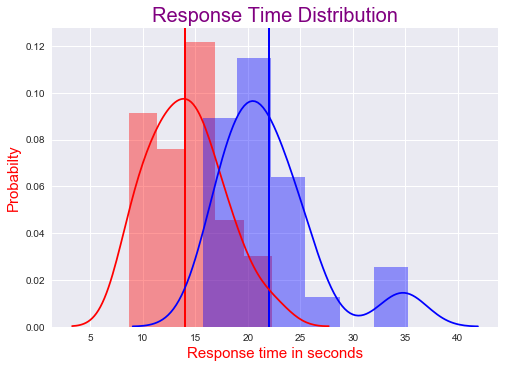

In [223]:
#loading libraries for plotting.
import seaborn as sns
import matplotlib.pyplot as plt

con_mean    = filename['Congruent'].mean()
incon_mean  = filename['Incongruent'].mean()

#plotting the mean value with vertical lines.
sns.plt.axvline(x=con_mean, linewidth=2, color='red')
sns.plt.axvline(x=incon_mean, linewidth=2, color='blue')

#plotting the distribution plot with both the independent variables.
distplot=sns.distplot(filename['Congruent'],color='red')              
distplot=sns.distplot(filename['Incongruent'],color='blue')      

#giving labels
distplot.set_xlabel("Response time in seconds",fontsize=15,color="red")
distplot.set_ylabel("Probabilty",fontsize=15,color="red")
distplot.set_title("Response Time Distribution",fontsize=20,color="purple")
sns.plt.show()
                 


The range of the Incongruent data is more to the right when compared with that of the Congruent data. i.e Congruent tasks were completed faster than Incongrunet tasks.

Also, the Incongruent data has some peaks near the "35 seconds" mark as seen in the figure indicating that some outliers are present.




# 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [219]:
x1=filename['Congruent']
x2=filename['Incongruent']

#calculating the t-statistic and p-value.
from scipy import stats
values=stats.ttest_rel(x1,x2)
print (values)
print ("t-statistic: " +str(values[0]))
print ("p-value: " +str(values[1]))


Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)
t-statistic: -8.02070694411
p-value: 4.10300058571e-08


In [224]:
#calculating the confidence interval
z=x1-x2
print (stats.t.interval(0.95,loc=z.mean(),scale=stats.sem(z),df=23))

(-10.019027909364912, -5.9105554239684226)


For a confidence interval of 95%, two-tailed test (alternate hypothesis being difference in means, which can mean either less than or greater than with respect to one another of the independant variables) , $\alpha (level)= 0.05 $  i.e 0.025 in each tail of the distribution:

degrees of freedom = (number of samples  -  1 )= 24 - 1 = 23

From [the table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg) : for 23 and 0.025 ,
we get :

t-critical value= $\pm$ 2.069






The t-statistic ( - 8.0207 )   is greater than t- critical value ( -2.069 )
i.e it lies in the critical region .

Therefore , we reject the null hypothesis and accept the alternative hypothesis.

This means the population means for Congruent and Incongruent scores are not same i.e they have a 'statistical difference'.

There is sufficient evidence at the α = .05 level of significance to support the claim that there exists a statistical difference in recognizing the congruent and incongruent conditions.


People do not name colours at the same speed when the word’s meaning and its colour match, as when they do not match. The result confirms this expectations.


# 6. What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect?

I think the human brain is  more entitled to "read" than "see" i.e irrespective of color, the human brain would be fast in reading the "text", kind of going with the impulse.

It wouldn't be that easy for the brain to tell the color of the word when the word is in different color with respect to its text.
When there is a mismatch, of text and the color it is depicted with, the brain might take additional time to process the information.

Interactive "Number Stroop" Effect Experiment is a similar experiment.
In this experiment one is required to count the number of words the word appears where the words would be the word of the number.





# References

1.http://ci.columbia.edu/ci/premba_test/c0331/s7/s7_4.html

2.https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

3.https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

4.https://faculty.washington.edu/chudler/java/readyn.html
